In [8]:
from cdsgd import DSClustering
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from lime.lime_tabular import LimeTabularExplainer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import silhouette_score, accuracy_score
import wittgenstein as lw
#pca
from sklearn.decomposition import PCA

In [9]:
rectangle = pd.read_csv('../data/rectangle_df.csv')
rectangle_labels = rectangle['labels']
rectangle = rectangle.drop(columns=['labels'])

Kmeans Silhouette Score: 0.4180232361798178 Number of Clusters: 2
DBSCAN Silhouette Score: N/A Number of Clusters: 1
Agglomerative Silhouette Score: 0.4180232361798178 Number of Clusters: 2


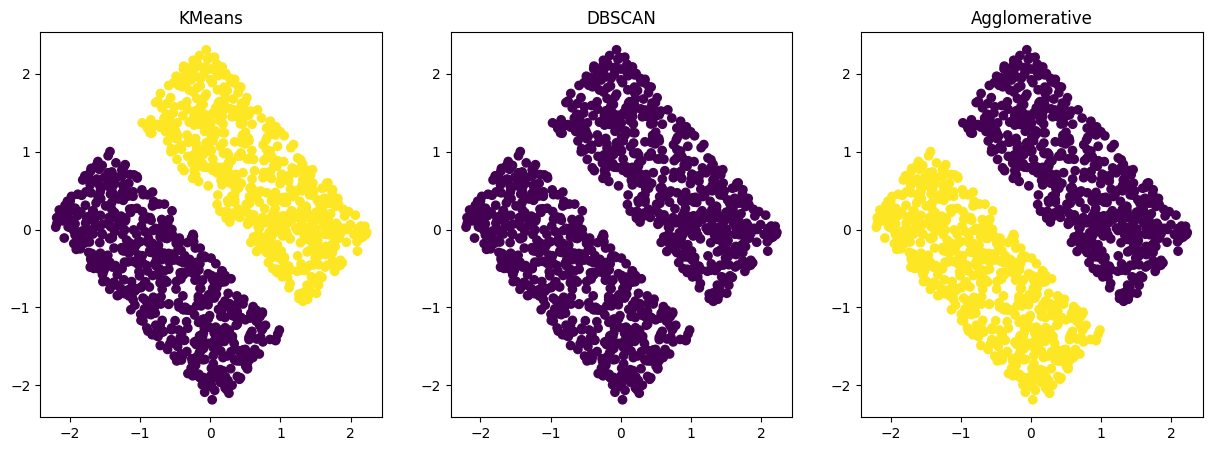

In [23]:
scaler = StandardScaler()
rectangle_scaled = scaler.fit_transform(rectangle)
rectangle = pd.DataFrame(rectangle_scaled, columns=rectangle.columns)
models = []
kmeans = KMeans(n_clusters=2)
kmeans_labels = kmeans.fit_predict(rectangle)
models.append({'model': kmeans, 'name': 'KMeans', 'labels': kmeans_labels})
print('Kmeans Silhouette Score:', silhouette_score(rectangle, kmeans_labels), "Number of Clusters:", len(np.unique(kmeans_labels)))

dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(rectangle)
models.append({'model': dbscan, 'name': 'DBSCAN', 'labels': dbscan_labels})
if len(np.unique(dbscan_labels)) > 1:
    print('DBSCAN Silhouette Score:', silhouette_score(rectangle, dbscan_labels), "Number of Clusters:", len(np.unique(dbscan_labels)))
else:
    print('DBSCAN Silhouette Score: N/A', "Number of Clusters:", len(np.unique(dbscan_labels)))

agg = AgglomerativeClustering(n_clusters=2)
agg_labels = agg.fit_predict(rectangle)
models.append({'model': agg, 'name': 'Agglomerative', 'labels': agg_labels})
print('Agglomerative Silhouette Score:', silhouette_score(rectangle, agg_labels), "Number of Clusters:", len(np.unique(agg_labels)))

# visualize the clusters
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
for i, model in enumerate(models):
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(rectangle)
    ax[i].scatter(pca_result[:, 0], pca_result[:, 1], c=model['labels'], cmap='viridis')
    ax[i].set_title(model['name'])
plt.show()

## Lime

In [11]:
clustterToExplain = 1
i = 100 # instance to explain

#KMeans
y = (kmeans_labels == clustterToExplain).astype(int)
X_train, X_test, y_train, y_test = train_test_split(rectangle, y, test_size=0.2, random_state=42)
clf = LogisticRegression()
clf.fit(rectangle, y)
print('KMeans Accuracy:', accuracy_score(y, clf.predict(rectangle)))
explainer = LimeTabularExplainer(rectangle.values, mode='classification', feature_names=rectangle.columns, class_names=['0', '1'], discretize_continuous=True)
exp = explainer.explain_instance(rectangle.values[i], clf.predict_proba, num_features=5)
exp.show_in_notebook(show_table=True, show_all=False)

#DBSCAN
if len(np.unique(dbscan_labels)) > 1:
    y = (dbscan_labels == clustterToExplain).astype(int)
    X_train, X_test, y_train, y_test = train_test_split(rectangle, y, test_size=0.2, random_state=42)
    clf = LogisticRegression()
    clf.fit(rectangle, y)
    print('DBSCAN Accuracy:', accuracy_score(y, clf.predict(rectangle)))
    explainer = LimeTabularExplainer(rectangle.values, mode='classification', feature_names=rectangle.columns, class_names=['0', '1'], discretize_continuous=True)
    exp = explainer.explain_instance(rectangle.values[i], clf.predict_proba, num_features=5)
    exp.show_in_notebook(show_table=True, show_all=False)

#Agglomerative
y = (agg_labels == clustterToExplain).astype(int)
X_train, X_test, y_train, y_test = train_test_split(rectangle, y, test_size=0.2, random_state=42)
clf = LogisticRegression()
clf.fit(rectangle, y)
print('Agglomerative Accuracy:', accuracy_score(y, clf.predict(rectangle)))
explainer = LimeTabularExplainer(rectangle.values, mode='classification', feature_names=rectangle.columns, class_names=['0', '1'], discretize_continuous=True)
exp = explainer.explain_instance(rectangle.values[i], clf.predict_proba, num_features=5)
exp.show_in_notebook(show_table=True, show_all=False)

KMeans Accuracy: 0.9992082343626286


c:\Users\Daniel\Documents\GitHub\trabajo-dirigido\env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Agglomerative Accuracy: 1.0


c:\Users\Daniel\Documents\GitHub\trabajo-dirigido\env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


## Decision tree

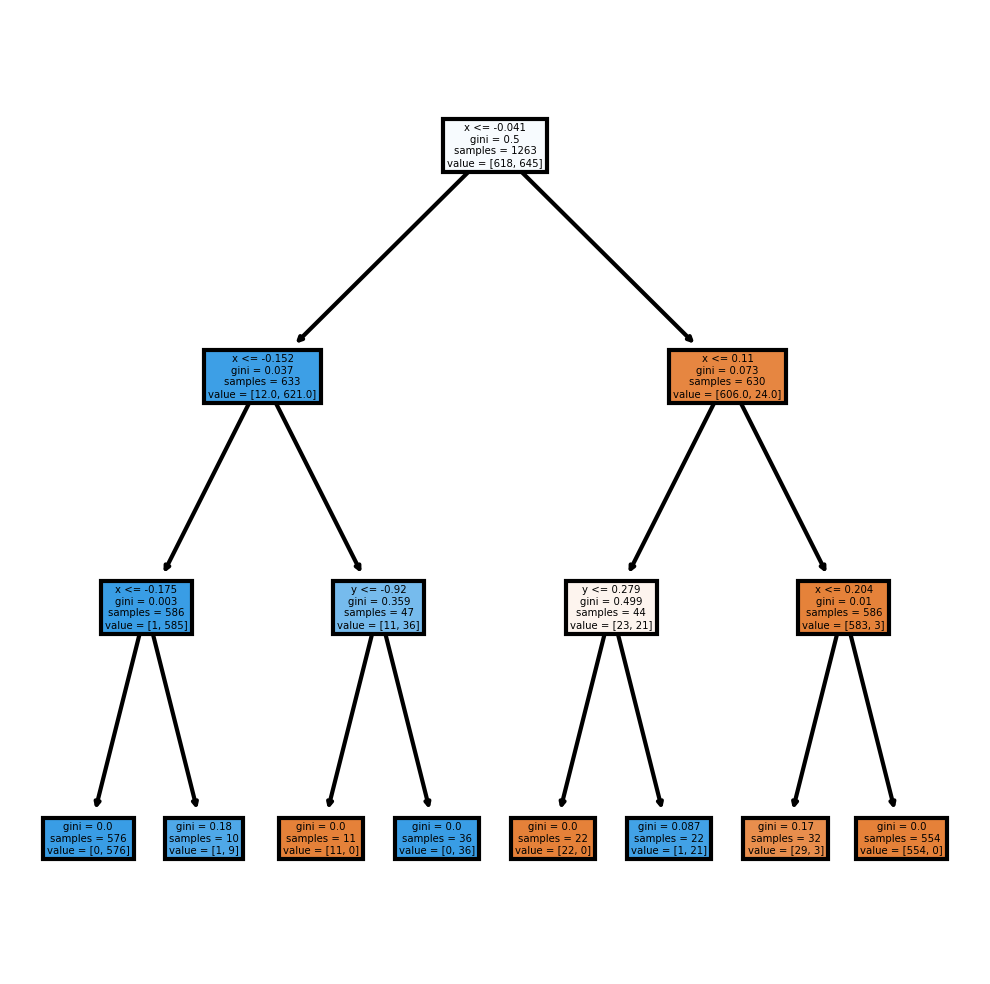

Decision Tree Accuracy: 0.9960411718131433


In [12]:
# interpretamos con decision tree
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(rectangle, kmeans_labels)
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 300)
plot_tree(dt, filled=True, ax=axes, feature_names=rectangle.columns)
plt.show()
y_pred = dt.predict(rectangle)
print('Decision Tree Accuracy:', accuracy_score(kmeans_labels, y_pred))


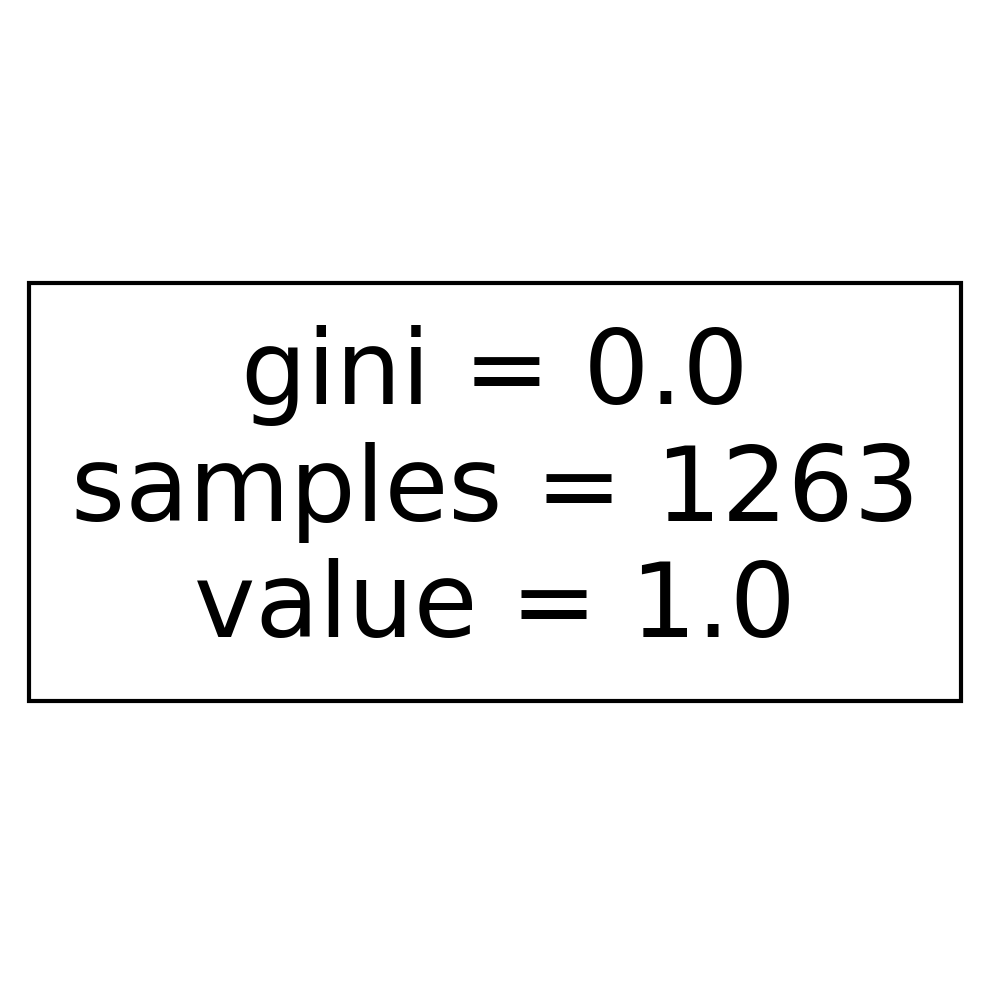

Decision Tree Accuracy: 1.0


In [13]:
# interpretamos con decision tree
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(rectangle, dbscan_labels)
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 300)
plot_tree(dt, filled=True, ax=axes, feature_names=rectangle.columns)
plt.show()
y_pred = dt.predict(rectangle)
print('Decision Tree Accuracy:', accuracy_score(dbscan_labels, y_pred))

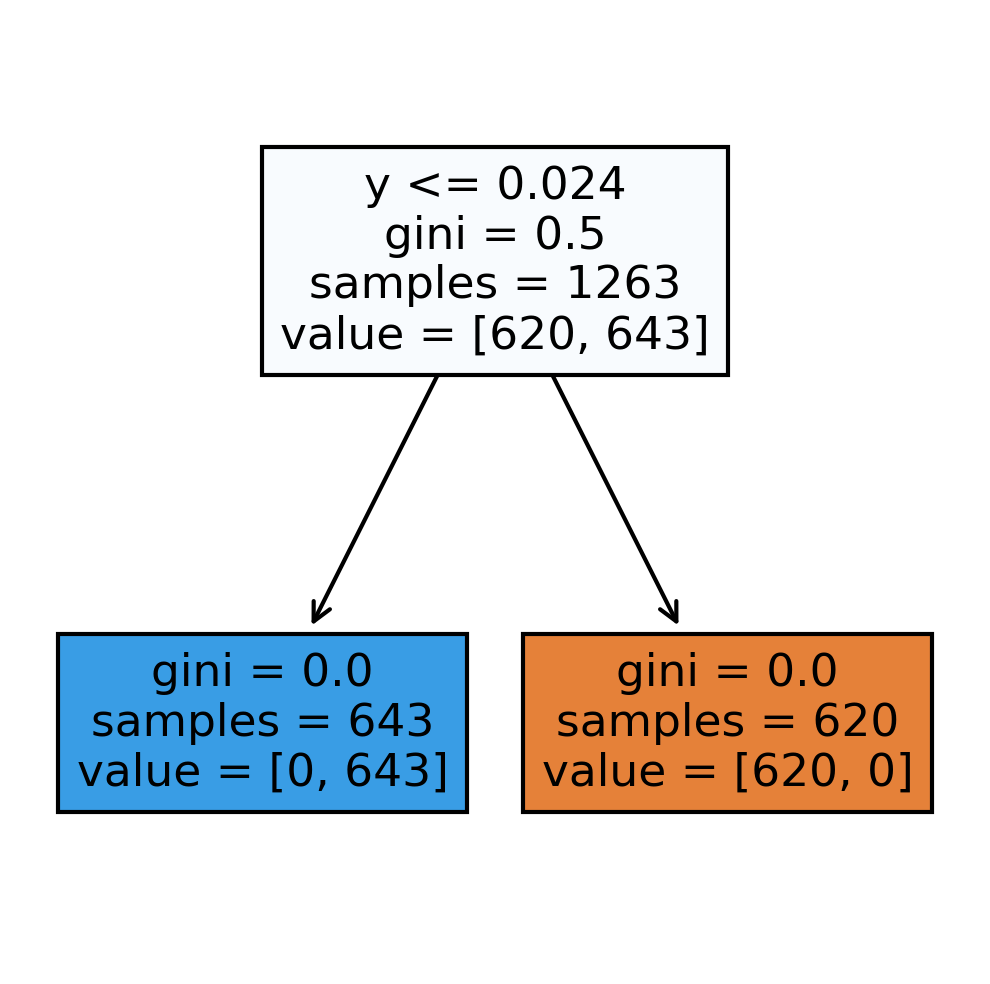

Decision Tree Accuracy: 1.0


In [14]:
# interpretamos con decision tree
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(rectangle, agg_labels)
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 300)
plot_tree(dt, filled=True, ax=axes, feature_names=rectangle.columns)
plt.show()
y_pred = dt.predict(rectangle)
print('Decision Tree Accuracy:', accuracy_score(agg_labels, y_pred))

# RIPPER

In [15]:
pos = 1
# cambiamos las etiquetas para que el positivo sea el cluster 0
kmeans_labels_pos = (kmeans_labels == pos).astype(int)
dbscan_labels_pos = (dbscan_labels == pos).astype(int)
agg_labels_pos = (agg_labels == pos).astype(int)
# KMeans
ripper = lw.RIPPER()
df = pd.concat([rectangle, pd.DataFrame(kmeans_labels_pos, columns=['label'])], axis=1)
ripper.fit(df, class_feat='label', pos_class=1)
print(ripper.ruleset_)
y_pred = ripper.predict(rectangle)
print('RIPPER Accuracy KMeans:', accuracy_score(kmeans_labels_pos, y_pred))
# DBSCAN
ripper = lw.RIPPER()
df = pd.concat([rectangle, pd.DataFrame(dbscan_labels_pos, columns=['label'])], axis=1)
ripper.fit(df, class_feat='label', pos_class=1)
print(ripper.ruleset_)
y_pred = ripper.predict(rectangle)
print('RIPPER Accuracy DBSCAN:', accuracy_score(dbscan_labels_pos, y_pred))
# Agglomerative
ripper = lw.RIPPER()
df = pd.concat([rectangle, pd.DataFrame(agg_labels_pos, columns=['label'])], axis=1)
ripper.fit(df, class_feat='label', pos_class=1)
print(ripper.ruleset_)
y_pred = ripper.predict(rectangle)
print('RIPPER Accuracy Agglomerative:', accuracy_score(agg_labels_pos, y_pred))

[[x=-1.35--1.02] V [x=-1.02--0.73] V [x=<-1.35] V [x=-0.73--0.44] V [x=-0.44--0.05^y=0.5-0.79] V [x=-0.44--0.05^y=-0.26-0.5] V [x=-0.44--0.05^y=1.06-1.34] V [x=-0.44--0.05^y=-0.78--0.52] V [x=-0.44--0.05^y=-0.52--0.26] V [x=-0.44--0.05^y=0.79-1.06] V [x=-0.44--0.05^y=>1.34] V [x=-0.44--0.05^y=-1.04--0.78] V [x=-0.05-0.34^y=1.06-1.34]]
RIPPER Accuracy KMeans: 0.9714964370546318
[]
RIPPER Accuracy DBSCAN: 1.0
[[y=-0.78--0.52] V [y=-1.04--0.78] V [y=-1.32--1.04] V [y=<-1.32] V [y=-0.52--0.26]]
RIPPER Accuracy Agglomerative: 0.9889152810768013


ripper.py: .fit: RuntimeWarning: 
No positive samples. Existing target labels=[0].

ripper.py: .fit | base.py: ._check_allpos_allneg: RuntimeWarning: 
Ruleset is empty. All predictions it makes with method .predict will be negative. It may be untrained or was trained on a dataset split lacking positive examples.

base.py: .predict | base.py: ._check_allpos_allneg: RuntimeWarning: 
Ruleset is empty. All predictions it makes with method .predict will be negative. It may be untrained or was trained on a dataset split lacking positive examples.



## DSClustering

Optimization started
Processing epoch	373	0.0002	

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



Training time: 55.04s, epochs: 400

Least training loss reached: 0.000


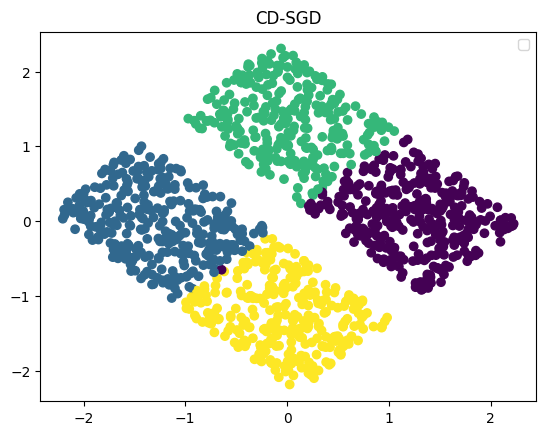

In [16]:
cdsgd = DSClustering(data=rectangle)
cdsgd.generate_categorical_rules()
cdsgd_labels = cdsgd.predict()
models.append({'model': cdsgd, 'name': 'CD-SGD', 'labels': cdsgd_labels})
#vvisualize the clusters
pca = PCA(n_components=2)
pca_result = pca.fit_transform(rectangle)
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=cdsgd_labels, cmap='viridis')
plt.title('CD-SGD')
plt.legend()
plt.show()

In [17]:
cdsgd.print_most_important_rules()



Most important rules for Cluster 0

	[0.640] R14: 0.043 < y < 0.723
			0: 0.487	1: 0.000	2: 0.353	3: 0.000	Unc: 0.159

	[0.523] R15: y > 0.723
			0: 0.371	1: 0.000	2: 0.366	3: 0.000	Unc: 0.263

	[0.521] R8: x < -0.671
			0: 0.358	1: 0.000	2: 0.000	3: 0.399	Unc: 0.243

	[0.519] R9: -0.671 < x < -0.007
			0: 0.361	1: 0.000	2: 0.000	3: 0.387	Unc: 0.252

	[0.518] R29: Negative x - -0.007, y - 0.043
			0: 0.349	1: 0.420	2: 0.000	3: 0.000	Unc: 0.231

Most important rules for Cluster 1

	[0.586] R13: -0.636 < y < 0.043
			0: 0.000	1: 0.437	2: 0.000	3: 0.348	Unc: 0.215

	[0.568] R29: Negative x - -0.007, y - 0.043
			0: 0.349	1: 0.420	2: 0.000	3: 0.000	Unc: 0.231

	[0.562] R12: y < -0.636
			0: 0.000	1: 0.410	2: 0.000	3: 0.359	Unc: 0.230

	[0.530] R10: -0.007 < x < 0.656
			0: 0.000	1: 0.378	2: 0.363	3: 0.000	Unc: 0.259

	[0.510] R11: x > 0.656
			0: 0.000	1: 0.352	2: 0.387	3: 0.000	Unc: 0.261

Most important rules for Cluster 2

	[0.573] R28: Positive x - -0.007, y - 0.043
			0: 0.000	1: 0.

c:\Users\Daniel\Documents\GitHub\trabajo-dirigido\env\Lib\site-packages\cdsgd\ClusteringSelector.py:248: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  row_modes[0][x] = self.get_best_labels()[x]


Optimization started
Processing epoch	373	0.0011	

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



Training time: 54.67s, epochs: 400

Least training loss reached: 0.001


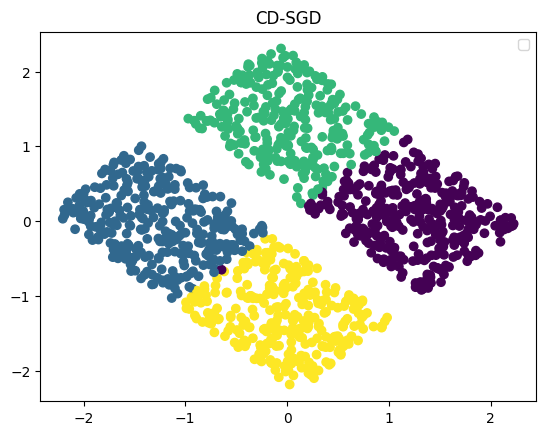

In [18]:
cdsgd = DSClustering(data=rectangle, most_voted=True)
cdsgd.generate_categorical_rules()
cdsgd_labels = cdsgd.predict()
models.append({'model': cdsgd, 'name': 'CD-SGD más votado', 'labels': cdsgd_labels})
#vvisualize the clusters
pca = PCA(n_components=2)
pca_result = pca.fit_transform(rectangle)
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=cdsgd_labels, cmap='viridis')
plt.title('CD-SGD')
plt.legend()
plt.show()

In [19]:
cdsgd.print_most_important_rules()



Most important rules for Cluster 0

	[0.677] R14: 0.043 < y < 0.723
			0: 0.521	1: 0.000	2: 0.359	3: 0.000	Unc: 0.120

	[0.535] R29: Negative x - -0.007, y - 0.043
			0: 0.354	1: 0.456	2: 0.000	3: 0.000	Unc: 0.191

	[0.476] R15: y > 0.723
			0: 0.320	1: 0.006	2: 0.380	3: 0.000	Unc: 0.294

	[0.468] R9: -0.671 < x < -0.007
			0: 0.311	1: 0.020	2: 0.000	3: 0.373	Unc: 0.296

	[0.437] R8: x < -0.671
			0: 0.301	1: 0.000	2: 0.000	3: 0.333	Unc: 0.366

Most important rules for Cluster 1

	[0.607] R29: Negative x - -0.007, y - 0.043
			0: 0.354	1: 0.456	2: 0.000	3: 0.000	Unc: 0.191

	[0.567] R13: -0.636 < y < 0.043
			0: 0.000	1: 0.422	2: 0.000	3: 0.340	Unc: 0.237

	[0.549] R12: y < -0.636
			0: 0.000	1: 0.393	2: 0.000	3: 0.376	Unc: 0.231

	[0.510] R11: x > 0.656
			0: 0.000	1: 0.345	2: 0.408	3: 0.000	Unc: 0.247

	[0.505] R10: -0.007 < x < 0.656
			0: 0.007	1: 0.351	2: 0.369	3: 0.000	Unc: 0.274

Most important rules for Cluster 2

	[0.598] R28: Positive x - -0.007, y - 0.043
			0: 0.000	1: 0.

In [24]:
cdsgd = DSClustering(data=rectangle,cluster=2)
cdsgd.generate_categorical_rules()
cdsgd_labels = cdsgd.predict()
models.append({'model': cdsgd, 'name': 'CD-SGD con 2 clusters', 'labels': cdsgd_labels})
#vvisualize the clusters
pca = PCA(n_components=2)
pca_result = pca.fit_transform(rectangle)
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=cdsgd_labels, cmap='viridis')
plt.title('CD-SGD')
plt.legend()
plt.show()

Optimization started
Processing epoch	156	0.0218	

In [21]:
cdsgd.print_most_important_rules()



Most important rules for Cluster 0

	[0.740] R4: x < -0.671
			0: 0.740	1: 0.000	Unc: 0.260

	[0.576] R5: -0.671 < x < -0.007
			0: 0.576	1: 0.000	Unc: 0.424

	[0.231] R10: 0.043 < y < 0.723
			0: 0.231	1: 0.000	Unc: 0.769

Most important rules for Cluster 1

	[0.664] R7: x > 0.656
			0: 0.000	1: 0.664	Unc: 0.336

	[0.485] R6: -0.007 < x < 0.656
			0: 0.000	1: 0.485	Unc: 0.515


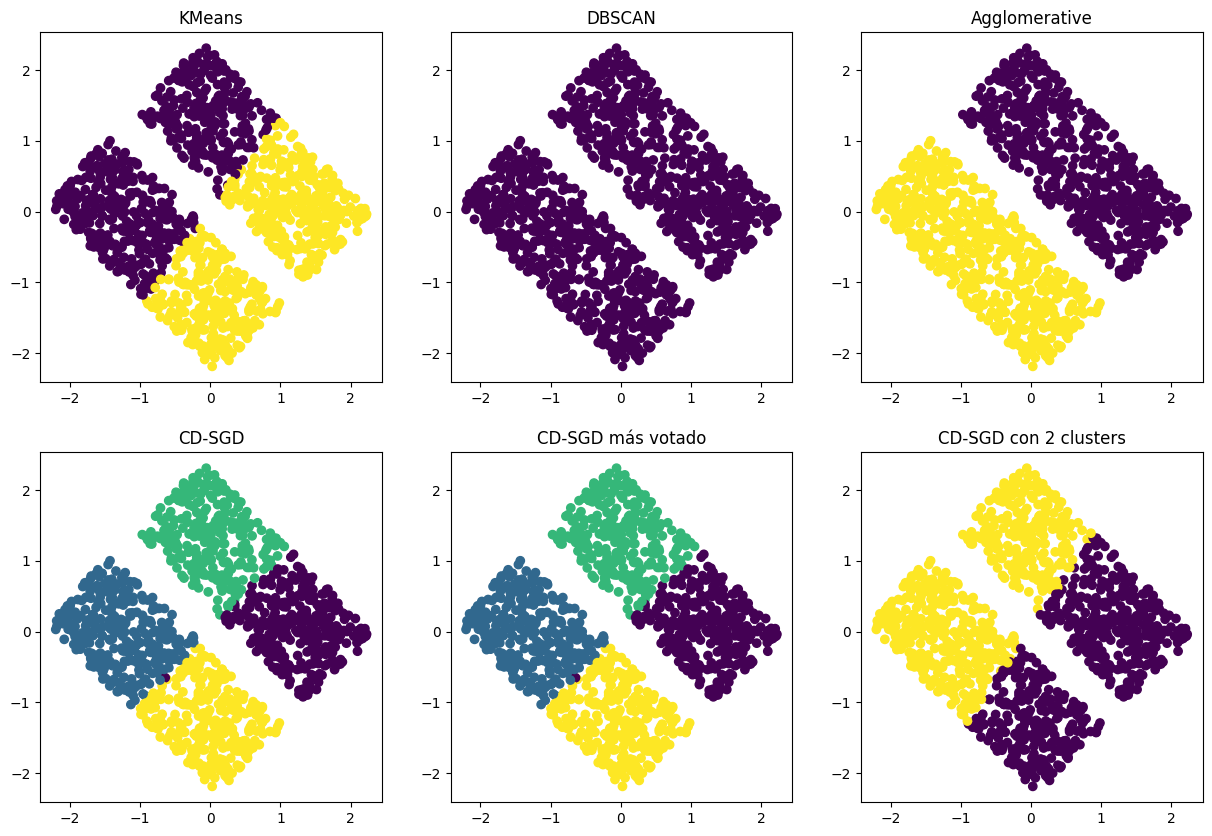

In [22]:
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
for i, model in enumerate(models):
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(rectangle)
    ax[i//3, i%3].scatter(pca_result[:, 0], pca_result[:, 1], c=model['labels'], cmap='viridis')
    ax[i//3, i%3].title.set_text(model['name'])
plt.show()